# TP 3 : CNN      "SASSI KAHINA"  grp 1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import keras
from setuptools.command.setopt import option_base
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer
from tensorflow.python.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten,BatchNormalization,Dropout
from tensorflow.python.keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Quleque Statistique sur la base OIHACDB

In [72]:
from PIL import Image
import os
from random import shuffle

DIR = 'C:/Users/lenovo/Desktop/ISSI S2/data mining/FinalDataSet'

def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Le nbr d'istance: "+ str(img_count))
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))

    

    label = np.arange(0,5600)
get_size_statistics()

Le nbr d'istance: 5600
Average Height: 128.0
Max Height: 128
Min Height: 128


Average Width: 128.0
Max Width: 128


## nombre d'instance pour chaque type

In [3]:
def NBR_attribue():
    y=[]
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            haay = os.path.join(img[:-7]) #l'opération: img[:-4] permet de supprimer l'extension ".bmp" dans le nom de l'image


            y.append(haay)
            
    return y

In [103]:
label=NBR_attribue()
label

['Aiin',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI_',
 'AiinI',
 'AiinI_',
 'AiinI_',

Text(0.5,1,'le nombre de classe ')

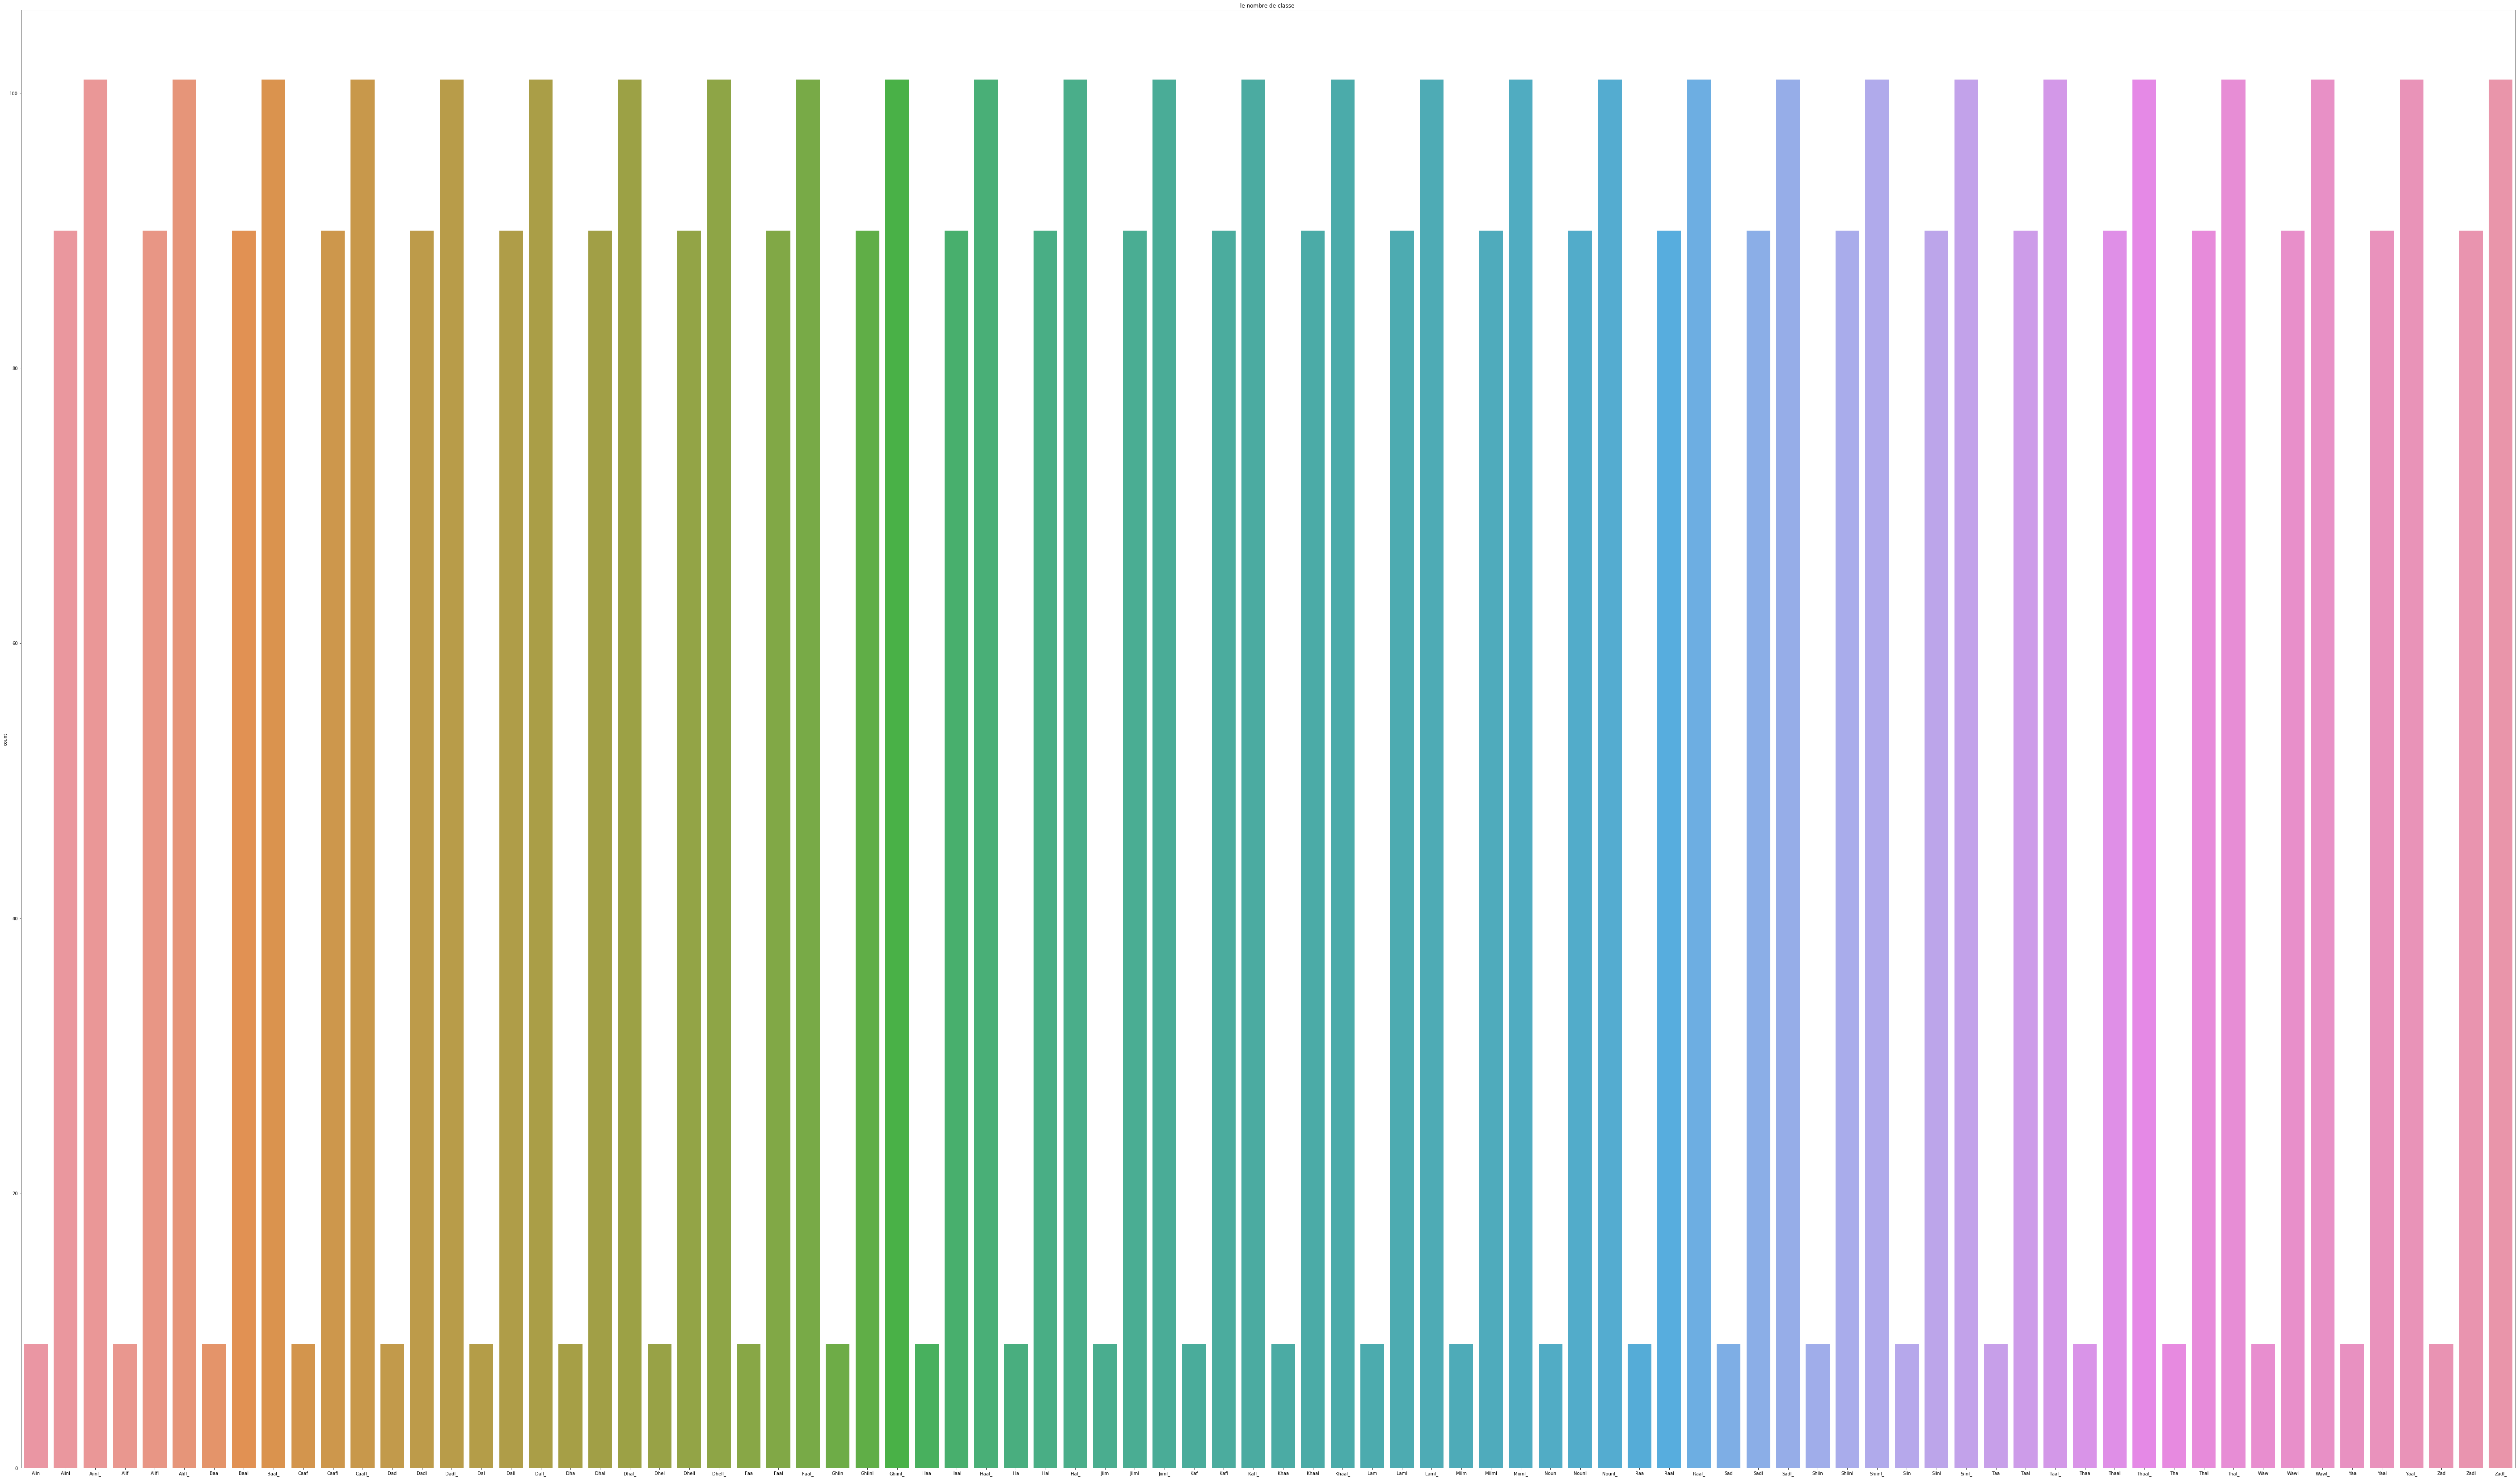

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualize number of digits classes
plt.figure(figsize=(100,60))
label=NBR_attribue()
sns.countplot(label)
plt.title("le nombre de classe ")
#vect=np.array(label)
#label.Collection.Counter()

## Chargement et encodage des attribues

## a) Encodage des attibues

In [8]:
def label_img(name):
    label = np.arange(0,5600)
    letters=range(0,28)
    k=0
    letter=range(0,200)
    for j in letters:
        for i in letter:
            label[k]=j
            k=k+1
    return label
    
label=label_img('name')
label.shape
label[200]

1

## b)Chargement des données

In [30]:
IMG_SIZE = 28
from keras.utils import to_categorical

def load_training_data():
    train_data = []
    label = label_img('name')
    trainY = to_categorical(label, num_classes=28)

    i=0

    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), trainY[i]])
            i=i+1
            
    #shuffle(train_data)
    return train_data

In [95]:
train_data = load_training_data()

# Affichage des images

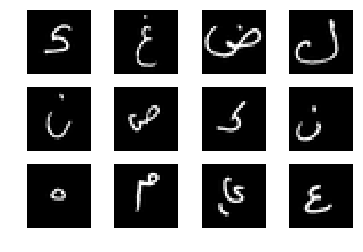

In [94]:
select = np.random.randint(images.shape[0], size=12)
# We display the images with the associated prediction
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r)
    

plt.show()

In [32]:
# Reshap
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

trainImages.shape 

(5600, 28, 28, 1)

## Découpage en Train et Test

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainImages,trainLabels, train_size=0.8)
    
print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)
print('y_train =', y_train.shape)

X_train = (4480, 28, 28, 1)
X_test = (1120, 28, 28, 1)
y_test = (1120, 28)
y_train = (4480, 28)


## Conception du Model

In [34]:
from keras import backend as K
def recall(y_true, y_pred):
    """Recall metric.

    c'est une métric pour la multi classification pour définir le nbr de classe 
    sélectionner.

    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


#  optimizer
sgd = keras.optimizers.SGD(lr=1e-4, momentum=0.9)
rms_prop = keras.optimizers.RMSprop(lr=1e-4)
adam = keras.optimizers.adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08) 
adamax = keras.optimizers.Adamax(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

## Le Model convolutionel

In [42]:
batch_size = 86
num_classes =28
epochs = 100
input_shape = (28, 28, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3, 3),padding='same', activation='relu'))
model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation = "softmax"))

## Compilation du model

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy', recall])

In [44]:
datagenn = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images




## Entrainement du model

In [45]:
datagenn.fit(X_train)

In [46]:
history = model.fit_generator(datagenn.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)


Epoch 1/100
 - 50s - loss: 15.2219 - acc: 0.0369 - recall: 0.0367 - val_loss: 14.1748 - val_acc: 0.0366 - val_recall: 0.0366
Epoch 2/100
 - 47s - loss: 15.1613 - acc: 0.0376 - recall: 0.0371 - val_loss: 14.9126 - val_acc: 0.0330 - val_recall: 0.0330
Epoch 3/100
 - 40s - loss: 15.1445 - acc: 0.0358 - recall: 0.0356 - val_loss: 14.2662 - val_acc: 0.0304 - val_recall: 0.0295
Epoch 4/100
 - 34s - loss: 13.7758 - acc: 0.0393 - recall: 0.0379 - val_loss: 4.0841 - val_acc: 0.0509 - val_recall: 0.0071
Epoch 5/100
 - 33s - loss: 4.4216 - acc: 0.0432 - recall: 0.0040 - val_loss: 3.2665 - val_acc: 0.0857 - val_recall: 0.0000e+00
Epoch 6/100
 - 33s - loss: 3.3755 - acc: 0.0459 - recall: 0.0000e+00 - val_loss: 3.2567 - val_acc: 0.0902 - val_recall: 0.0000e+00
Epoch 7/100
 - 33s - loss: 3.3363 - acc: 0.0501 - recall: 0.0000e+00 - val_loss: 3.2431 - val_acc: 0.0955 - val_recall: 0.0000e+00
Epoch 8/100
 - 33s - loss: 3.2814 - acc: 0.0559 - recall: 0.0000e+00 - val_loss: 3.1220 - val_acc: 0.1188 - val_

In [104]:
result = model.evaluate(x=X_test, y= y_test)
print('Accuracy:', result[1])

1120/1120 [==============================] - 3s 3ms/step
Accuracy: 0.9705357142857143


## Les Résultats:1- Loss

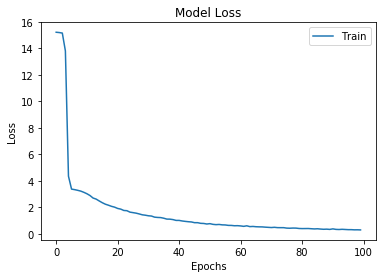

In [48]:
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

## Les Résultats:2- Accurancy

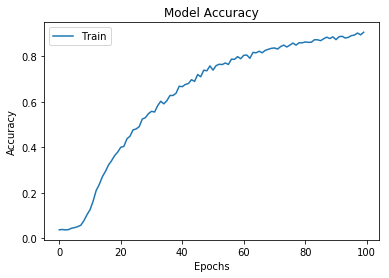

In [49]:
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

## Les Résultats: 3- la matrice de confusion

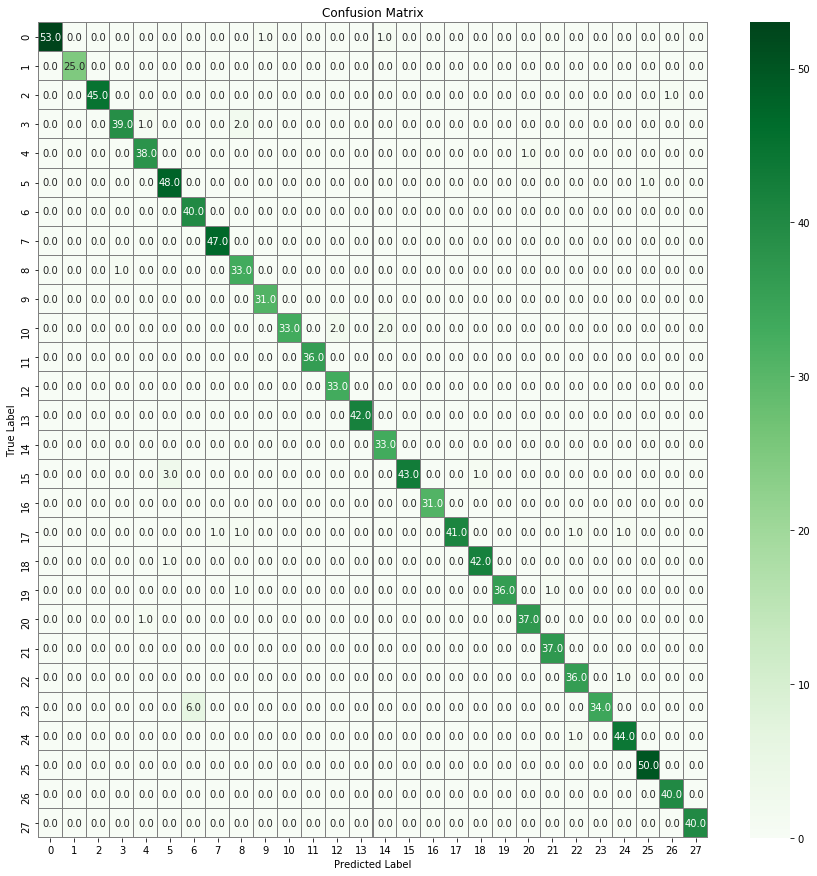

In [106]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Les Résultats: 4- le rapport de classification

In [69]:
from sklearn.metrics import classification_report

print(classification_report(Y_true,Y_pred_classes)) 


             precision    recall  f1-score   support

          0       1.00      0.96      0.98        55
          1       1.00      1.00      1.00        25
          2       1.00      0.98      0.99        46
          3       0.97      0.93      0.95        42
          4       0.95      0.97      0.96        39
          5       0.92      0.98      0.95        49
          6       0.87      1.00      0.93        40
          7       0.98      1.00      0.99        47
          8       0.89      0.97      0.93        34
          9       0.97      1.00      0.98        31
         10       1.00      0.89      0.94        37
         11       1.00      1.00      1.00        36
         12       0.94      1.00      0.97        33
         13       1.00      1.00      1.00        42
         14       0.92      1.00      0.96        33
         15       1.00      0.91      0.96        47
         16       1.00      1.00      1.00        31
         17       1.00      0.91      0.95   

## Affichage de quelques images avec leurs étiquettes prédites et réelles.

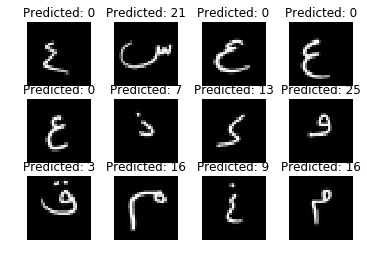

In [117]:
images = X_test.reshape((-1, 28, 28))
select = np.random.randint(images.shape[0], size=12)

misclass = (Y_true != Y_pred_classes)
misclass_images = images[misclass,:,:]
misclass_predicted = Y_pred_classes[misclass]

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r)
    plt.title('Predicted: %i' % Y_pred_classes[value])



plt.show()

## les classes mal prédites

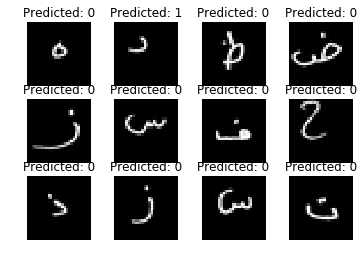

In [120]:
images = X_test.reshape((-1, 28, 28))
select = np.random.randint(images.shape[0], size=12)

misclass = (Y_true != Y_pred_classes)
misclass_images = images[misclass,:,:]
misclass_predicted = Y_pred_classes[misclass]

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r)
    plt.title('Predicted: %i' % misclass[value])



plt.show()